<a href="https://colab.research.google.com/github/valterlucena/recuperacao-informacao/blob/master/stemming/token_stemming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
nltk.download('rslp')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import collections
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
DATA_URL = 'https://raw.githubusercontent.com/valterlucena/ri_lab_01/master/output/results.csv'
news = pd.read_csv(DATA_URL).replace(np.nan, '', regex=True)

In [0]:
toker = RegexpTokenizer('''\w+[-']*\w*''')
stop_words = stopwords.words('portuguese')

def isValid(token):
  return token not in stop_words and not bool(re.search(r'\d', token))

word_list = []
for new in news.text:
  tokens = [token for token in toker.tokenize(new) if isValid(token)]
  word_list.extend(tokens)
  
word_list

In [0]:
total_documents = news.text.count()
total_word_occurrences = len(word_list)
vocabulary_size = len(set(word_list))

words = pd.DataFrame(word_list, columns=['word'])
word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'freq']
word_counts['r'] = word_counts.freq.rank(ascending=False, method='first')

occurs_mt_thousand = len(word_counts[word_counts.freq > 1000])
occurs_once = len(word_counts[word_counts.freq == 1])

In [82]:
statistics = ['Total documents', 
              'Total word occurences',
              'Vocabulary size',
              'Words occuring > 1000 times',
              'Words occuring once'
             ]

values = [total_documents,
          total_word_occurrences,
          vocabulary_size,
          occurs_mt_thousand,
          occurs_once
         ]

result_table = pd.DataFrame(data={'statistics': statistics, 'values': values})
result_table

,statistics,values
0,Total documents,146
1,Total word occurences,36223
2,Vocabulary size,11055
3,Words occuring > 1000 times,0
4,Words occuring once,6314


mach  -  ['machismo', 'machista', 'Machado', 'machado']
fer  -  ['ferida', 'fera', 'feriram', 'feridos']
so  -  ['so', 'sozinho', 'sozinhos', 'Soares']
mont  -  ['monte', 'montadoras', 'montagem']
lid  -  ['lidar', 'lida', 'lidera']
tra  -  ['traiu', 'traição', 'tratores']
dou  -  ['doutora', 'doutor', 'dou']
carn  -  ['carne', 'carnes', 'Carneiro']
far  -  ['farinha', 'Faria', 'faria']
médic  -  ['médico', 'Médico', 'Médici']
tem  -  ['Temer', 'temas', 'tema']

abord  -  ['aborda'] abordá-l  -  ['abordá-la']
academ  -  ['academia'] acadêm  -  ['acadêmica']
acess  -  ['acesso', 'acessem', 'acessível'] acessibil  -  ['acessibilidade']
acid  -  ['acidente', 'acidentes'] acident  -  ['acidental']
acompanh  -  ['acompanhou', 'acompanho', 'acompanhamos', 'acompanhando'] acompanhá-l  -  ['acompanhá-los']
acontec  -  ['acontecendo', 'acontecem'] aconteç  -  ['aconteça', 'aconteçam']
acredit  -  ['acredito', 'acredita', 'acreditou'] acredita-s  -  ['Acredita-se']
adot  -  ['adotava', 'adotadas', 'adotados', 'adotando', 'adota'] adoç  -  ['adoções', 'adoção']
advocac  -  ['advocacia'] advog  -  ['advogados', 'Advogados']
agind  -  ['agindo'] agir  -  ['agiram'] agiss  -  ['agissem']

In [0]:
stemmer = RSLPStemmer()
dicio = collections.OrderedDict()
stems = []
for word in word_list:
  stem = stemmer.stem(word)
  stems.append(stem)
  if stem in dicio.keys() and word not in dicio[stem]:
    dicio[stem].append(word)
  else:
    dicio[stem] = [word]
    

In [83]:
pr = (word_counts.freq / total_word_occurrences)
word_counts['Pr %'] = round(pr * 100, 2)
r_pr = word_counts.r * pr
word_counts['r.Pr'] = round(r_pr, 3)
word_counts.head(50)

,word,freq,r,Pr %,r.Pr
0,é,432,1.0,1.19,0.012
1,O,291,2.0,0.80,0.016
2,A,250,3.0,0.69,0.021
3,Brasil,200,4.0,0.55,0.022
4,Lula,176,5.0,0.49,0.024
5,Bolsonaro,163,6.0,0.45,0.027
6,governo,142,7.0,0.39,0.027
7,ser,135,8.0,0.37,0.030
8,sobre,116,9.0,0.32,0.029
9,presidente,112,10.0,0.31,0.031


In [85]:
best_c_words = np.mean(r_pr)
round(best_c_words, 3)

0.208

In [0]:
word_counts['pred'] = best_c_words / pr

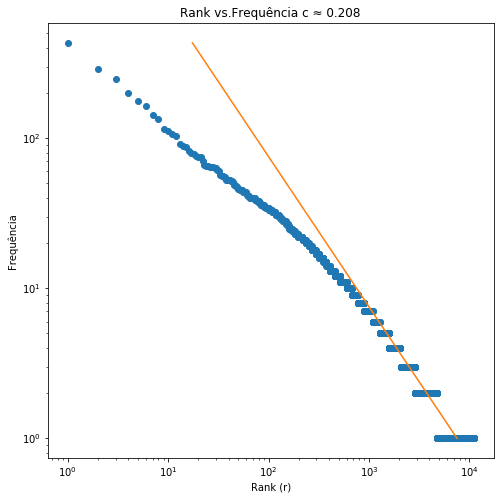

In [87]:
f, ax = plt.subplots(figsize=(8,8))
ax.set(xscale="log", yscale="log")
plt.plot(word_counts["r"], word_counts["freq"], linestyle="", marker="o")
plt.plot(word_counts["pred"], word_counts["freq"], linestyle="-", marker="")
plt.title('Rank vs.Frequência c ≈ {0:.3f}'.format(best_c_words))
plt.xlabel('Rank (r)')
plt.ylabel('Frequência')
plt.show()